In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [13]:
VPOP_RESULTS = {
    "ASIPD": { 
        "file": "vpop/sipd_ppo/vpop.pkl", 
        "shortens": {
            "SIPD/AlwaysCooperate-Default-v0": "Cooperator",
            "SIPD/AlwaysDefect-Default-v0": "Defector",
            "SIPD/TitForTat-Default-v0": "TitForTat",
            "SIPD/WinStayLoseSwitch-Default-v0": "WinLoseSwicth",
            "SIPD/ExtortionateZD-Default-v0": "ZD-Extortioner", 
        }, 
        "type": "players"
    },
    "MinAtar": {
        "file": "vpop/minatar_dqn/shapley/vpop.pkl", 
        "shortens": {
            "MinAtar/Asterix-v0": "Asterix",
            "MinAtar/Breakout-v0": "Breakout",
            "MinAtar/Freeway-v0": "Freeway",
            "MinAtar/Seaquest-v0": "Sequest",
            "MinAtar/SpaceInvaders-v0": "SpaceInvaders"
        }, 
        "type": "games" 
    },
    "MNIST": {
        "file": "vpop/mnist_sgd/shapley/vpop.pkl", 
        "shortens": {
            "2": "Digit2",
            "3": "Digit3",
            "4": "Digit4",
            "5": "Digit5",
            "7": "Digit7"
        }, 
        "type": "class"
    },
    "CIFAR10": {
        "file": "vpop/cifar10_sgd/shapley/vpop.pkl", 
        "shortens": {
            "1": "Car",
            "3": "Cat",
            "4": "Deer",
            "5": "Dog",
            "6": "Frog",
            "7": "Horse"
        }, 
        "type": "class"
    },
    "MinAtar-ONR": {
        "file": "vpop/minatar_ordered_dqn/nowak_radzik/vpop.pkl", 
        "shortens": {
            "MinAtar/Asterix-v0": "Asterix",
            "MinAtar/Breakout-v0": "Breakout",
            "MinAtar/Freeway-v0": "Freeway",
            "MinAtar/Seaquest-v0": "Sequest",
            "MinAtar/SpaceInvaders-v0": "SpaceInvaders"
        }, 
        "type": "games" 
    },
    "MinAtar-OSB": {
        "file": "vpop/minatar_ordered_dqn/sanchez_bergantinos/vpop.pkl", 
        "shortens": {
            "MinAtar/Asterix-v0": "Asterix",
            "MinAtar/Breakout-v0": "Breakout",
            "MinAtar/Freeway-v0": "Freeway",
            "MinAtar/Seaquest-v0": "Sequest",
            "MinAtar/SpaceInvaders-v0": "SpaceInvaders"
        }, 
        "type": "games" 
    },
    "ASIPD-OSB": {
        "file": "vpop/sipd_ordered_ppo/sb/vpop.pkl", 
        "shortens": {
            "SIPD/AlwaysCooperate-Default-v0": "Cooperator",
            "SIPD/AlwaysDefect-Default-v0": "Defector",
            "SIPD/TitForTat-Default-v0": "TitForTat",
            "SIPD/WinStayLoseSwitch-Default-v0": "WinLoseSwicth",
            "SIPD/ExtortionateZD-Default-v0": "ZD-Extortioner", 
        }, 
        "type": "players"
    },
    "ASIPD-ONR": {
        "file": "vpop/sipd_ordered_ppo/nr/vpop.pkl", 
        "shortens": {
            "SIPD/AlwaysCooperate-Default-v0": "Cooperator",
            "SIPD/AlwaysDefect-Default-v0": "Defector",
            "SIPD/TitForTat-Default-v0": "TitForTat",
            "SIPD/WinStayLoseSwitch-Default-v0": "WinLoseSwicth",
            "SIPD/ExtortionateZD-Default-v0": "ZD-Extortioner", 
        }, 
        "type": "players"
    },
}

In [14]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [15]:
def display_vpop(file: str, title: str, shortens: dict[str, str] = None, player_type: str = ""):
    df = pd.read_pickle(
        file,
    )
    # only against pure eval strategies
    # df.index = df.index.map(str)
    # all_colum = df['+'.join(df.index)]
    # df = df[df.index]
    # df['all'] = all_colum
    # all_table = df.loc[]
    df = df.loc['+'.join(shortens.keys())]
    # df = df.loc['SIPD/AlwaysDefect-Default-v0']

    # df.index['all'] = all_table
    
    # if shortens:
    #     df = df.rename(columns=shortens, index=shortens)

    with sns.plotting_context("notebook"): 
        # for player in df.index.unique("eval_team"):
        figure = plt.figure(figsize=set_size(397.48499))
        xf = df #.loc[player]
        if shortens:
            xf = xf.rename(columns=shortens, index=shortens)
        hm = sns.heatmap(
            xf, 
            cmap='GnBu', 
            linewidths=0.0, 
            annot=True, 
            fmt='.4f',
            vmin=xf.min().min(), vmax=xf.max().max(),
            cbar=False
        )
        hm.set(
            title=r"$\bf{units}$" + f" [{player_type}]", ylabel=r"$\bf{units}$" + f" [{player_type}]", 
            xlabel=r"$\phi_{\bar{\bf{u}}}(\bf{u}_i, \bf{u}_j)$"
        )
        hm.autoscale(True)
        hm.tick_params(top=True, bottom=False,
                    labeltop=True, labelbottom=False)
        plt.setp(hm.get_xticklabels(), rotation=15, ha="left",
                    rotation_mode="anchor")
        plt.setp(hm.get_yticklabels(), rotation=0, ha="right",
                    rotation_mode="anchor")
        figure.gca().set_title(title, loc="left")
        plt.savefig(
            os.path.join(os.path.dirname(file), f"{title}.pdf"),
            bbox_inches='tight',
            format='pdf'
        )

# Pure Evaluation Strategies

display: ASIPD
display: MinAtar
display: MNIST
display: CIFAR10
display: MinAtar-ONR
display: MinAtar-OSB
display: ASIPD-OSB
display: ASIPD-ONR


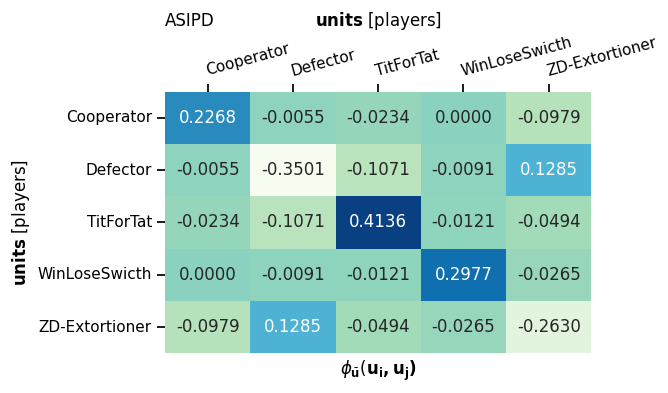

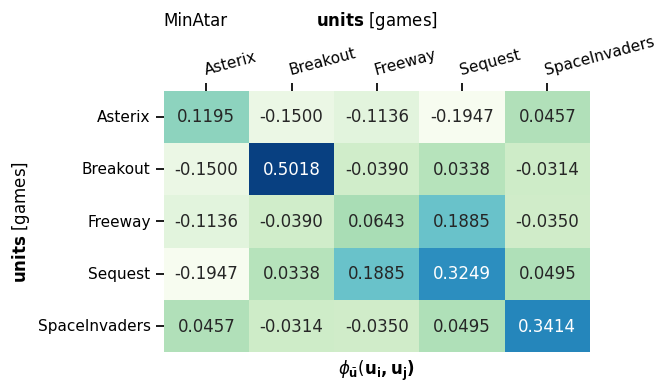

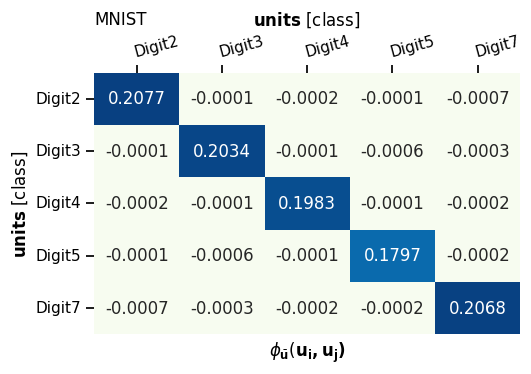

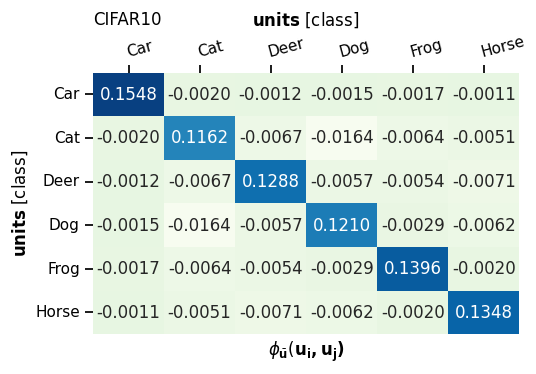

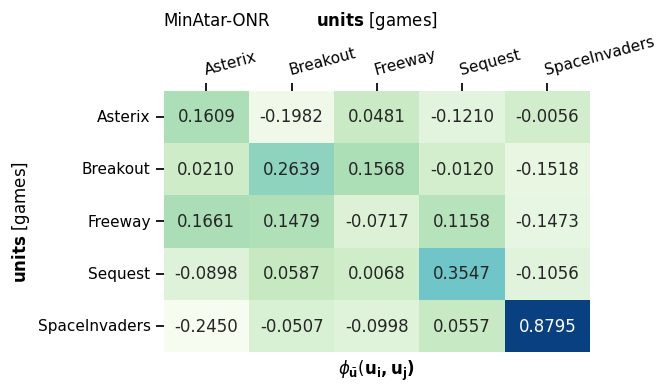

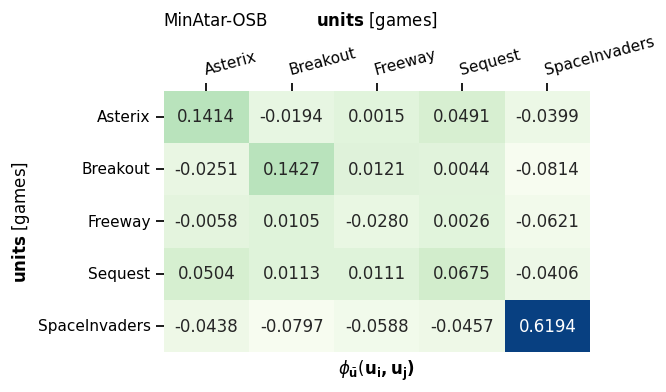

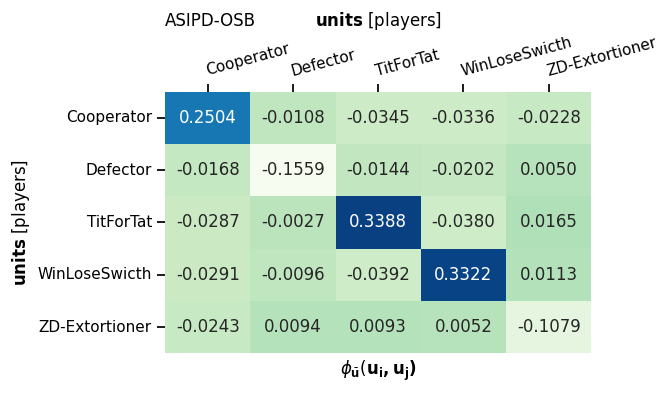

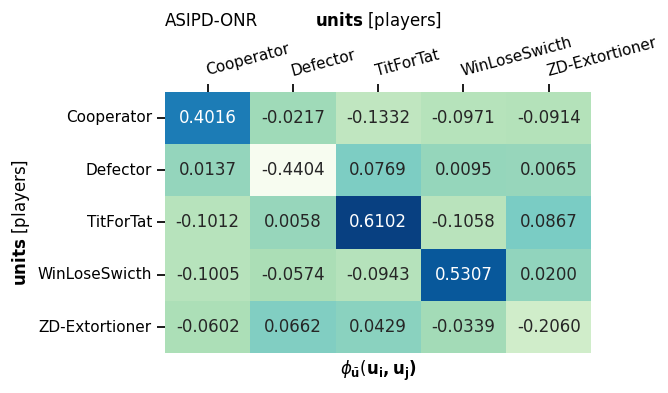

In [16]:
for result in VPOP_RESULTS:
    print(f'display: {result}')
    display_vpop(
        file=VPOP_RESULTS[result]['file'], 
        title=result, 
        shortens=VPOP_RESULTS[result]['shortens'],
        player_type=VPOP_RESULTS[result]['type']
    )

# Mixed Evaluation Strategies